# Student Exam Performance ML

## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/student_performance_interactions_cleaned.csv")

In [3]:
print(df.dtypes)

Unnamed: 0                     int64
student_id                    object
final_score                  float64
grade                         object
pass_fail                      int64
previous_score               float64
math_prev_score              float64
science_prev_score           float64
language_prev_score          float64
daily_study_hours            float64
attendance_percentage        float64
homework_completion_rate     float64
sleep_hours                  float64
screen_time_hours            float64
physical_activity_minutes    float64
motivation_score             float64
exam_anxiety_score           float64
parent_education_level        object
study_environment             object
score_improvement            float64
performance_band              object
dtype: object


In [4]:
df.head()

,Unnamed: 0,student_id,final_score,grade,pass_fail,previous_score,math_prev_score,science_prev_score,language_prev_score,daily_study_hours,...,homework_completion_rate,sleep_hours,screen_time_hours,physical_activity_minutes,motivation_score,exam_anxiety_score,parent_education_level,study_environment,score_improvement,performance_band
0,0,S0001,60.137241,D,1,60.599707,61.488212,53.568119,64.972292,1.427203,...,68.534371,6.809352,3.313096,65.059425,4.150025,6.104103,Master,Noisy,-0.462466,Average
1,1,S0002,99.021977,A,1,92.289287,85.612565,91.873759,89.040461,4.813612,...,91.990197,5.567793,4.925359,76.016617,8.714693,1.982358,High School,Quiet,6.732690,Excellent
2,2,S0003,70.522955,C,1,80.259667,82.160656,72.736065,74.243663,1.240908,...,69.669666,6.702875,5.107888,113.616872,5.928220,4.463662,High School,Moderate,-9.736712,Average
3,3,S0004,63.448537,D,1,72.926217,75.979145,76.726496,67.715995,2.190601,...,71.976757,7.854439,3.772446,108.686690,4.224928,4.740474,High School,Noisy,-9.477679,Average
4,4,S0005,66.483019,C,1,48.581025,51.379977,48.993224,46.145011,2.192265,...,68.940591,7.662429,1.898989,42.107294,9.506815,1.143852,Master,Quiet,17.901994,Average


In [5]:
df = df.rename(columns = {
    'attendance_percentage': 'attendance',
    'homework_completion_rate': 'homework',
    'screen_time_hours': 'screen_time'
})

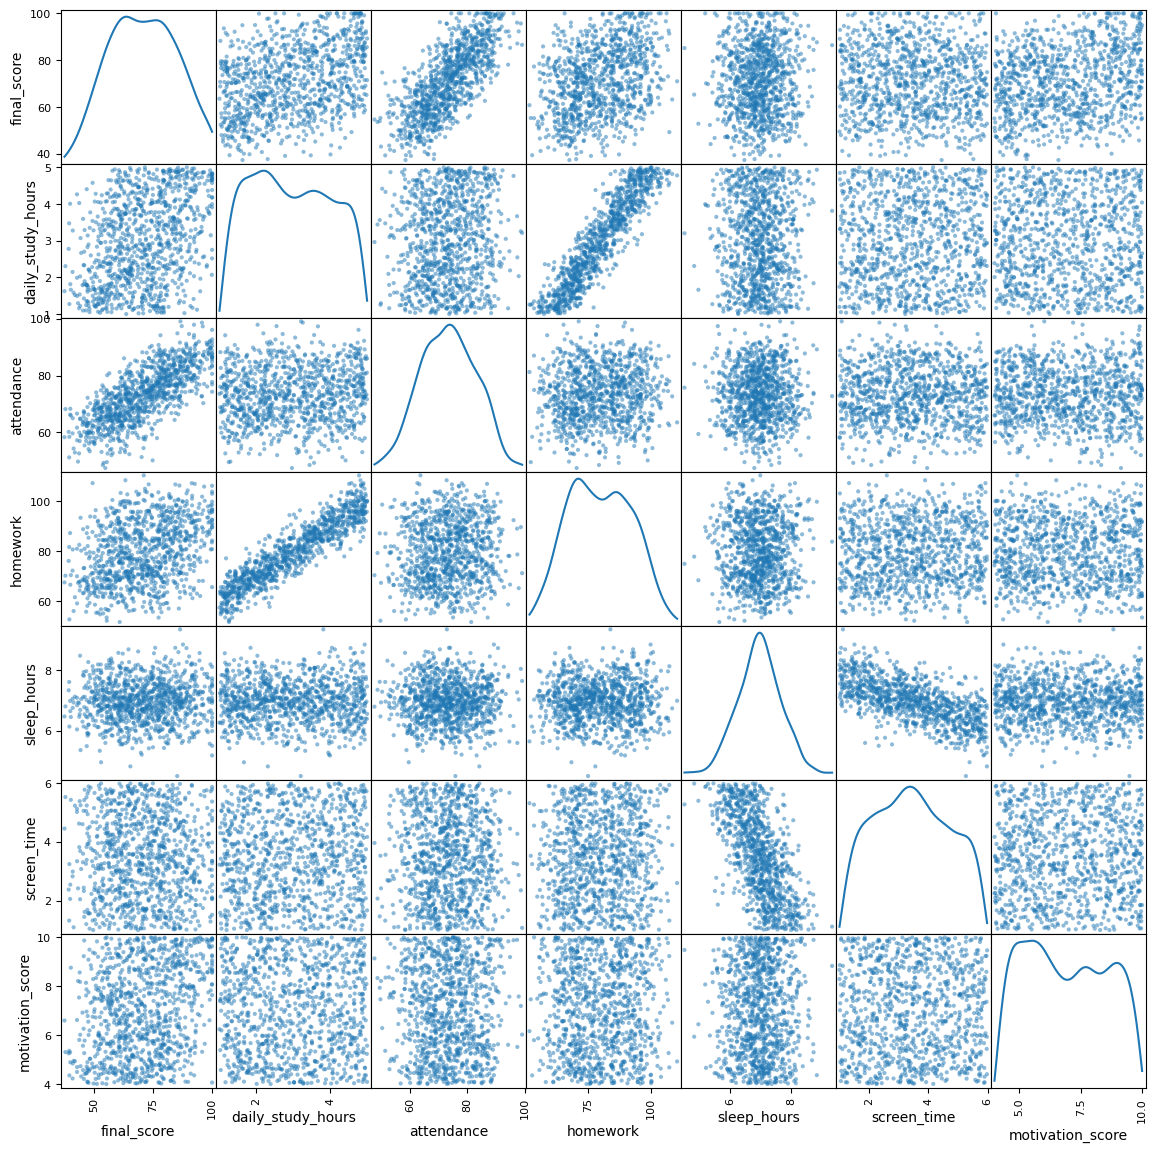

In [6]:
from pandas.plotting import scatter_matrix

selected_cols = [
    'final_score', 
    'daily_study_hours', 
    'attendance', 
    'homework', 
    'sleep_hours', 
    'screen_time', 
    'motivation_score'
]

fig = plt.figure(1, figsize=(14, 14)) 
fig.clf() 
ax = fig.gca() 
scatter_matrix(df[selected_cols], alpha=0.5, diagonal='kde', ax=ax)
plt.show()

<Axes: xlabel='daily_study_hours', ylabel='homework'>

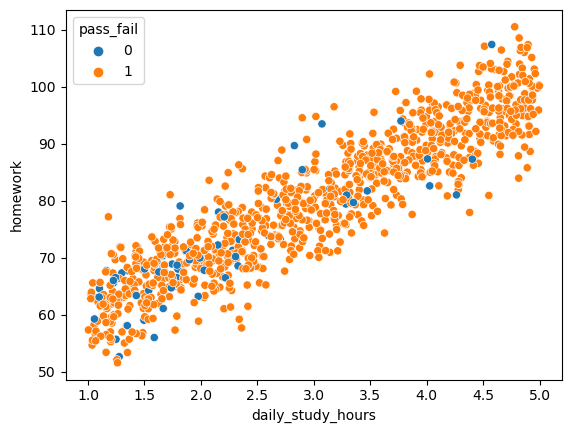

In [7]:
sns.scatterplot(data=df, x="daily_study_hours", y="homework", hue="pass_fail")

<Axes: xlabel='final_score', ylabel='attendance'>

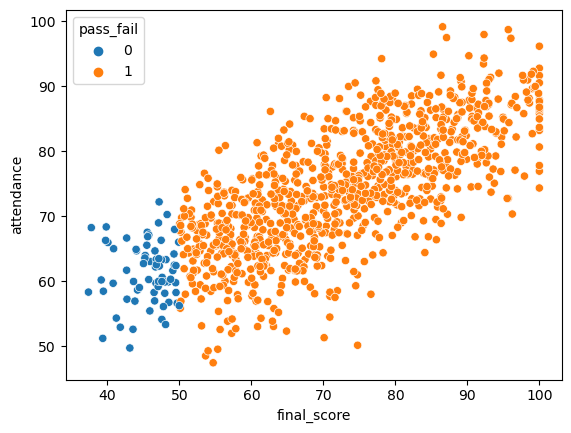

In [8]:
sns.scatterplot(data=df, x="final_score", y="attendance", hue="pass_fail")

<Axes: xlabel='final_score', ylabel='homework'>

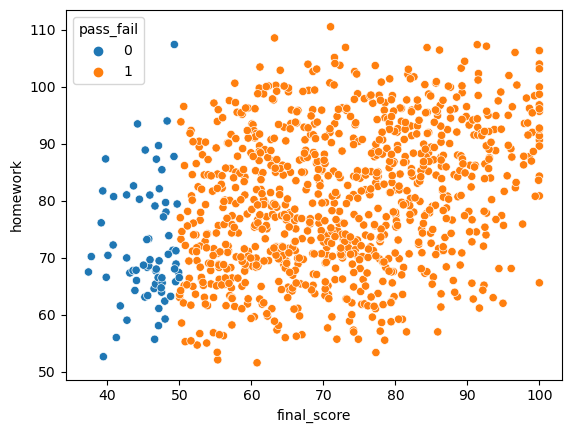

In [9]:
sns.scatterplot(data=df, x="final_score", y="homework", hue="pass_fail")

<Axes: xlabel='pass_fail', ylabel='homework'>

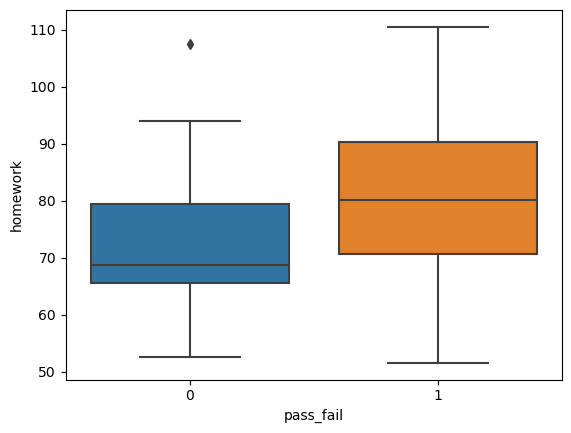

In [10]:
sns.boxplot(x="pass_fail", y="homework", data=df)

<Axes: xlabel='pass_fail', ylabel='attendance'>

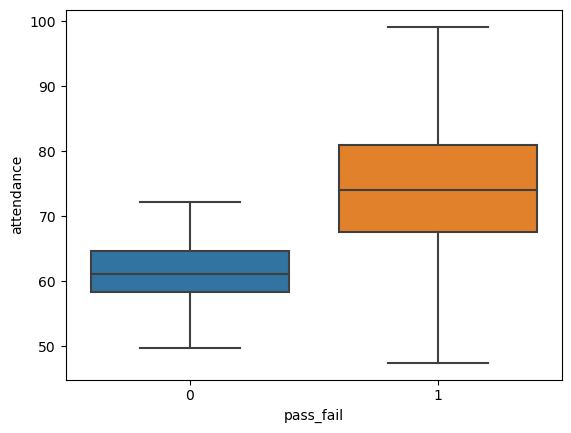

In [11]:
sns.boxplot(x="pass_fail", y="attendance", data=df)

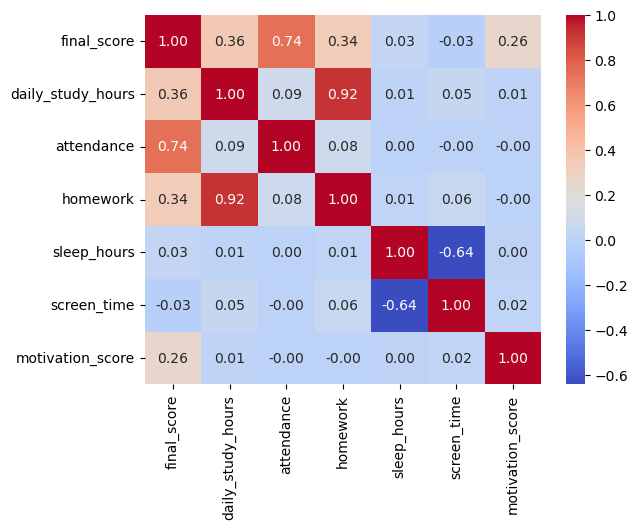

In [12]:
correlation_matrix = df[selected_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

## Student Exam Performance modeling

### Logistic Regression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

X = df.copy().drop(["pass_fail", "final_score"], axis=1)
y = df.copy()["pass_fail"]

cat_cols = ["parent_education_level", "study_environment"]
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first"), cat_cols)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

log_model = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(max_iter=1000))
])

log_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Unnamed: 0', 'previous_score', 'math_prev_score', 'science_prev_score',
       'language_prev_score', 'daily_study_hours', 'attendance', 'homework',
       'sleep_hours', 'screen_time', 'physical_activity_minutes',
       'motivation_score', 'exam_anxiety_score', 'score_improvement'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['parent_education_level',
                                                   'study_environment'])])),
                ('clf', LogisticRegression(max_iter=1000))])

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(model, X_train, X_test, y_train, y_test, X_full=None, y_full=None):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    if X_full is not None and y_full is not None:
        print("Model score: \t{:.4f}".format(model.score(X_full, y_full)))
        
    print("Score against training data: \t{:.4f}".format(model.score(X_train, y_train)))

    print("Accuracy score: \t{:.4f}".format(accuracy))
    print("Precision score: \t{:.4f}".format(precision))
    print("Recall: \t{:.4f}".format(recall))
    print("F1 score: \t{:.4f}".format(f1))
    print("\nConfusion matrix:\n", conf_matrix)

evaluate_model(log_model, X_train, X_test, y_train, y_test, X, y)

Model score: 	0.9880
Score against training data: 	0.9900
Accuracy score: 	0.9800
Precision score: 	0.9840
Recall: 	0.9946
F1 score: 	0.9892

Confusion matrix:
 [[ 12   3]
 [  1 184]]


In [16]:
probabilities = log_model.predict_proba(X_test)[:,1]

thresholds = [0.05, 0.1, 0.2]

for threshold in thresholds:
    predicted = (probabilities >= threshold).astype(int)
    
    precision = precision_score(y_test, predicted)
    recall = recall_score(y_test, predicted)
    f1 = f1_score(y_test, predicted)
    
    print("\nThreshold: {:.2f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(threshold, precision, recall, f1))


Threshold: 0.05, Precision: 0.9536, Recall: 1.0000, F1-score: 0.9763

Threshold: 0.10, Precision: 0.9635, Recall: 1.0000, F1-score: 0.9814

Threshold: 0.20, Precision: 0.9686, Recall: 1.0000, F1-score: 0.9840


In [17]:
log_model = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(max_iter = 1000, class_weight="balanced"))
])

log_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Unnamed: 0', 'previous_score', 'math_prev_score', 'science_prev_score',
       'language_prev_score', 'daily_study_hours', 'attendance', 'homework',
       'sleep_hours', 'screen_time', 'physical_activity_minutes',
       'motivation_score', 'exam_anxiety_score', 'score_improvement'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['parent_education_level',
                                                   'study_environment'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [18]:
evaluate_model(log_model, X_train, X_test, y_train, y_test, X, y)

Model score: 	0.9630
Score against training data: 	0.9637
Accuracy score: 	0.9600
Precision score: 	1.0000
Recall: 	0.9568
F1 score: 	0.9779

Confusion matrix:
 [[ 15   0]
 [  8 177]]


### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline([
    ("prep", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=300, random_state=42))
])

rf_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Unnamed: 0', 'previous_score', 'math_prev_score', 'science_prev_score',
       'language_prev_score', 'daily_study_hours', 'attendance', 'homework',
       'sleep_hours', 'screen_time', 'physical_activity_minutes',
       'motivation_score', 'exam_anxiety_score', 'score_improvement'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['parent_education_level',
                                                   'study_environment'])])),
                ('clf',
                 RandomForestClassifier(n_estimators=300, random_state=42))])

In [20]:
evaluate_model(rf_model, X_train, X_test, y_train, y_test, X, y)

Model score: 	0.9940
Score against training data: 	1.0000
Accuracy score: 	0.9700
Precision score: 	0.9735
Recall: 	0.9946
F1 score: 	0.9840

Confusion matrix:
 [[ 10   5]
 [  1 184]]


In [21]:
rf_model = Pipeline([
    ("prep", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42))
])

rf_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Unnamed: 0', 'previous_score', 'math_prev_score', 'science_prev_score',
       'language_prev_score', 'daily_study_hours', 'attendance', 'homework',
       'sleep_hours', 'screen_time', 'physical_activity_minutes',
       'motivation_score', 'exam_anxiety_score', 'score_improvement'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['parent_education_level',
                                                   'study_environment'])])),
                ('clf',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=5,
                                        min_samples_split=10, n_estimators=200,
                                        random_state=42))])

In [22]:
evaluate_model(rf_model, X_train, X_test, y_train, y_test, X, y)

Model score: 	0.9880
Score against training data: 	0.9912
Accuracy score: 	0.9750
Precision score: 	0.9737
Recall: 	1.0000
F1 score: 	0.9867

Confusion matrix:
 [[ 10   5]
 [  0 185]]


### XGBoost (eXtreme Gradient Boosting)

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

X = df.copy().drop(["pass_fail", "final_score"], axis=1)
y = df.copy()["pass_fail"]

cat_cols = ["parent_education_level", "study_environment"]
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first"), cat_cols)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [24]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [27]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train_preprocessed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [28]:
y_pred = xgb_model.predict(X_test_preprocessed)

In [29]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.985
[[ 12   3]
 [  0 185]]


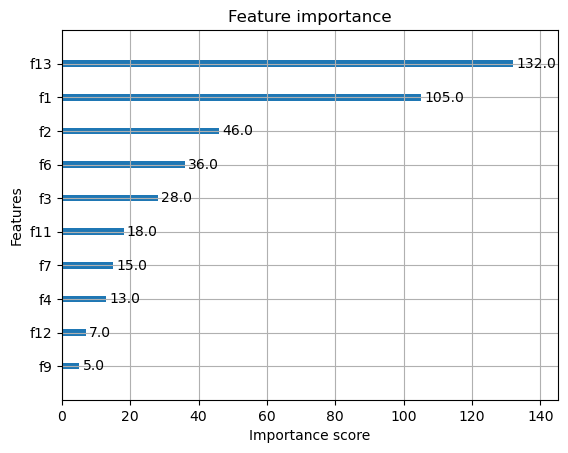

In [30]:
xgb.plot_importance(xgb_model, max_num_features=10)
plt.show()